# Context

Link to kaggle: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", 101)
seed = 42

# EDA

In [3]:
data = pd.read_csv("train.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# target variable perfectly balanced
data["price_range"].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

So ,ther's no missing values, no categorical features(object type) that should be converted , that's why I will directly jump into data visualization part.

In [6]:
categorical = [ "blue","dual_sim","four_g","three_g","touch_screen","wifi"  ]

## Stats info

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data.skew()

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

In [9]:
data.kurtosis()

battery_power   -1.224144
blue            -2.001602
clock_speed     -1.323417
dual_sim        -2.000555
fc               0.277076
four_g          -1.994575
int_memory      -1.216074
m_dep           -1.274349
mobile_wt       -1.210376
n_cores         -1.229750
pc              -1.171499
px_height       -0.315865
px_width        -1.186005
ram             -1.191913
sc_h            -1.190791
sc_w            -0.389523
talk_time       -1.218591
three_g         -0.492161
touch_screen    -2.001859
wifi            -2.001217
price_range     -1.360400
dtype: float64

## Correlation with target

There is 20 features which I can observe respect to target variable, but It will take a lot time to observe individually, that's why i will choose only top correlated features with target variable.

In [10]:
target_corr = data.corr()["price_range"]
target_corr = target_corr[ abs(target_corr) > 0.1  ]
target_corr

battery_power    0.200723
px_height        0.148858
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

In [11]:
target_corr = target_corr.index[:-1]

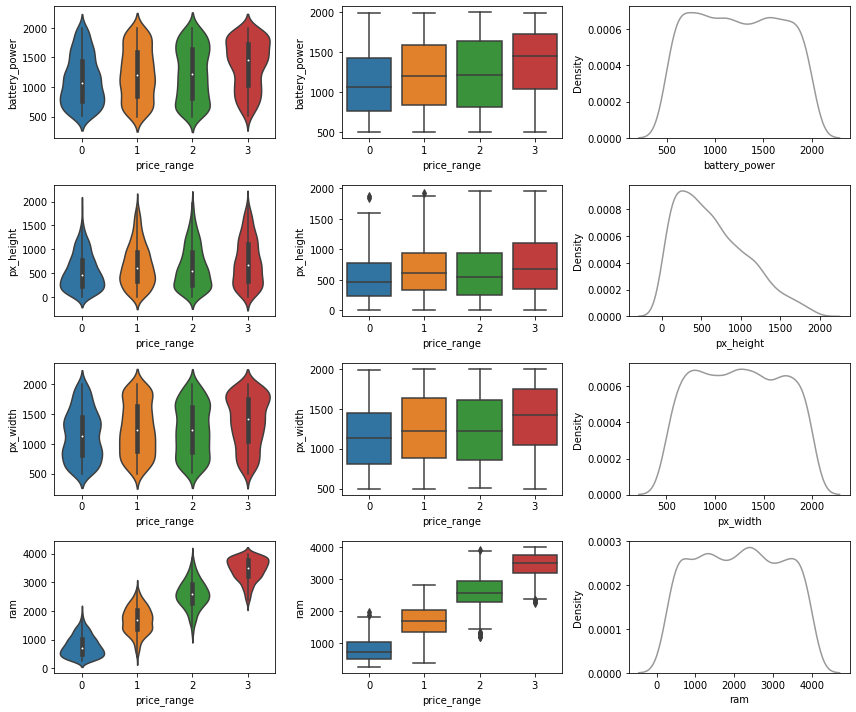

In [12]:
fig, ax = plt.subplots( ncols = 3, nrows = len(target_corr), figsize = (12,10) )

for i,name in enumerate(target_corr):
    sns.violinplot(x="price_range", y= name, data=data, ax=ax[i,0])
    sns.boxplot( x="price_range", y= name, data=data, ax=ax[i,1] )
    sns.kdeplot( x=name,  data=data, ax=ax[i,2], color=".6" )
plt.tight_layout()
plt.show()

## Multicollinearity

In [13]:
# check if there is multicolinearity 
multi_corr = []
features = data.drop(columns = "price_range")
for feat in features.columns:
    feat_corr = features.corr()[feat]
    feat_corr = feat_corr[ (abs(feat_corr) > 0.5) & ( abs(feat_corr) < 1 )  ]
    rel = [ feat ]+[ i for i in feat_corr.index ]
    
    
    if ( len(feat_corr) >0  ) and ( sorted(rel) not in [ sorted(i) for i in multi_corr ] ) :
        print(  "{:-^30}".format( feat ) )
        print(feat_corr)
        multi_corr.append( rel )
    

--------------fc--------------
pc    0.644595
Name: fc, dtype: float64
------------four_g------------
three_g    0.584246
Name: four_g, dtype: float64
----------px_height-----------
px_width    0.510664
Name: px_height, dtype: float64
-------------sc_h-------------
sc_w    0.506144
Name: sc_h, dtype: float64


In [14]:
multi_corr

[['fc', 'pc'],
 ['four_g', 'three_g'],
 ['px_height', 'px_width'],
 ['sc_h', 'sc_w']]

There is some multicollinearity. Imedeantly in my mind rises 3 common solutions:<br>
1) Remove one of them, by keepping feature which mostly correlated with target variable<br>
2) Keep both and in ML model buildig procces as algorithm should be considered regularization for penaltize our model. L1 or L2 regularizations will take care of this.<br>
3) Create feature which will represent both.

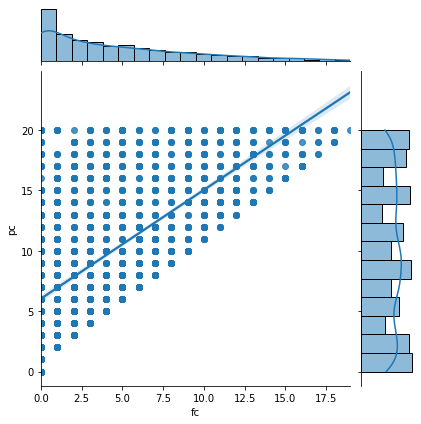

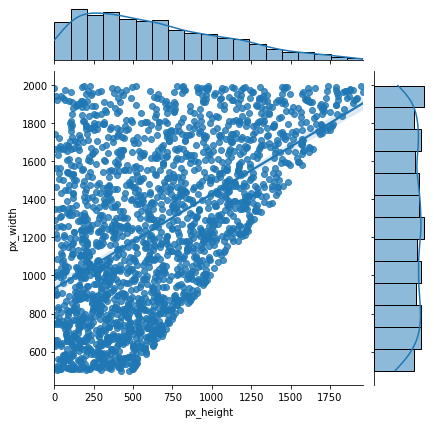

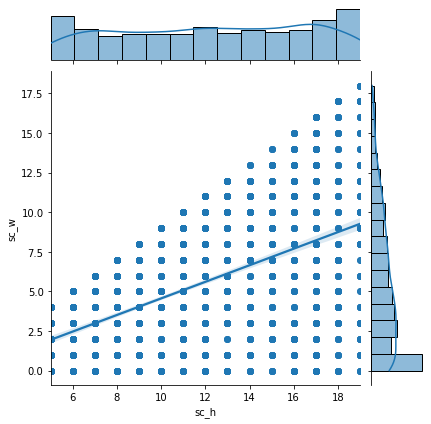

In [15]:

for feats in multi_corr:
    if ( feats[0] in categorical ) and ( feats[1] in categorical ):
        continue
    sns.jointplot( x=feats[0], y=feats[1] , kind="reg", data =data  )
plt.show()

## Exploring categorical features

In [16]:
categorical

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

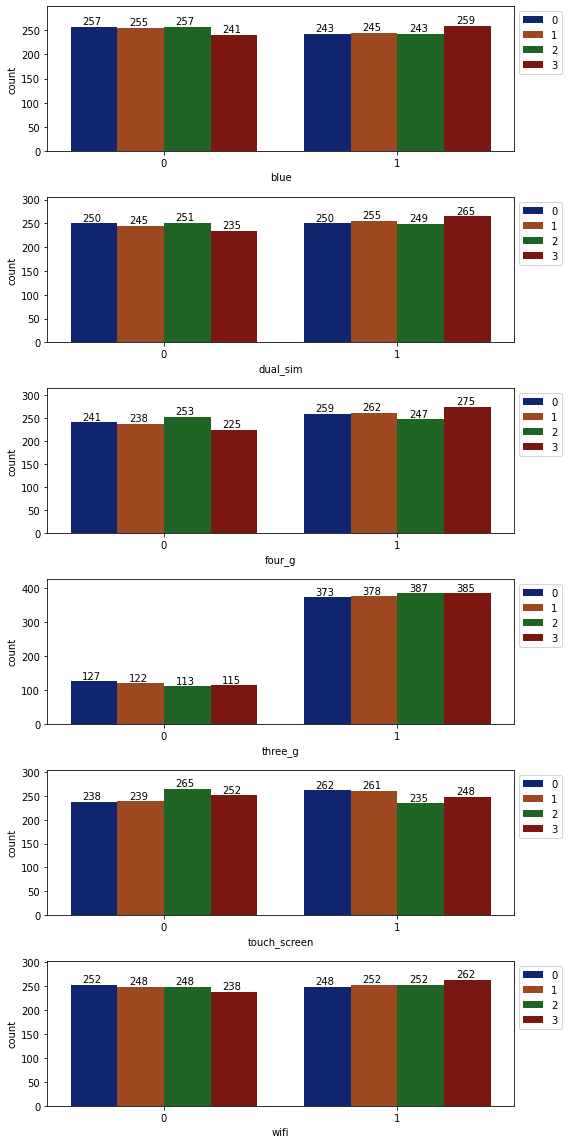

In [17]:
# ploting categorical features
fig, ax = plt.subplots( nrows = len(categorical), ncols = 1, figsize = (8,16) )

for i,cat in enumerate(categorical):
    sns.countplot(x=cat, data=data, hue = "price_range", palette="dark", ax=ax[i] )
    ax[i].legend(bbox_to_anchor=(1, 1), loc=2)
    
    bars = ax[i].patches
    max_h = 0
    for bar in bars:
        h = bar.get_height()
        w = bar.get_width()
        x = bar.get_x()
        if h>max_h:
            max_h=h
        ax[i].text( x + (w/4) , h+5, f"{h}" )
        
    ax[i].set_ylim(0, max_h+40 )
            
plt.tight_layout()
plt.show()

# Model building

In [19]:
import scipy.stats as sts
import statsmodels.api as sm


## Feature engineering

Now , it's time to merge some features (  (px_height,px_width) and (sc_w,sc_h)  )

In [20]:
data_0 = data.copy()

In [21]:
# compute diagonal
data_0["px_diag"] = np.sqrt((data_0["px_height"]**2) + (data_0["px_width"]**2))
data_0["sc_diag"] = np.sqrt((data_0["sc_h"]**2) + (data_0["sc_w"]**2))


In [22]:
data_0.corr()[ [ "price_range", "px_diag","sc_diag","sc_w","sc_h","px_width","px_height" ] ]

,price_range,px_diag,sc_diag,sc_w,sc_h,px_width,px_height
battery_power,0.200723,-0.002250,-0.028288,-0.021421,-0.029959,-0.008402,0.014901
blue,0.020573,-0.035174,-0.004532,0.000613,-0.002952,-0.041533,-0.006872
clock_speed,-0.006606,-0.013799,-0.023688,-0.007378,-0.029078,-0.009476,-0.014523
dual_sim,0.017444,0.003658,-0.012742,-0.016666,-0.011949,0.014291,-0.020875
fc,0.021998,-0.005307,-0.012362,-0.012373,-0.011014,-0.005176,-0.009990
four_g,0.014772,-0.001109,0.034260,0.037005,0.027166,0.007448,-0.019236
int_memory,0.044435,-0.000456,0.029967,0.011731,0.037771,-0.008335,0.010441
m_dep,0.000853,0.026933,-0.024651,-0.018388,-0.025348,0.023566,0.025263
mobile_wt,-0.030302,-0.001274,-0.033830,-0.020761,-0.033855,0.000090,0.000939
n_cores,0.004399,0.014178,0.007829,0.025826,-0.000315,0.024480,-0.006872


In [23]:
data_0.skew()[ [ "px_diag","sc_diag","sc_w","sc_h","px_width","px_height" ] ]

px_diag      0.227180
sc_diag      0.099704
sc_w         0.633787
sc_h        -0.098884
px_width     0.014787
px_height    0.666271
dtype: float64

Result is not bad. Seems correlation increased between px and target variable( earlier px_width-0.165818 and px_height - 0.148858)  ,but there are still no correlation between target variable and sc_diag( earlier sc_w-0.038711 and sc_h - 0.022986) <br>
Even new features distributed well( < 0.5 )

In [24]:
data_0.drop(  columns = ["sc_w","sc_h","px_width","px_height"], inplace = True )

### Data transformation

Before building models( such as logistic regression ), should be considered one of the main assumption: <br>
`Data skewness`<br>

In [25]:
# See which features are skewd
skwed = [  i for i in data.skew()[ abs(data.skew()) > 0.5 ].index if i not in categorical   ]
data.skew()[ abs(data.skew()) > 0.5 ]
  

fc           1.019811
px_height    0.666271
sc_w         0.633787
three_g     -1.228142
dtype: float64

In [26]:
skwed

['fc', 'px_height', 'sc_w']

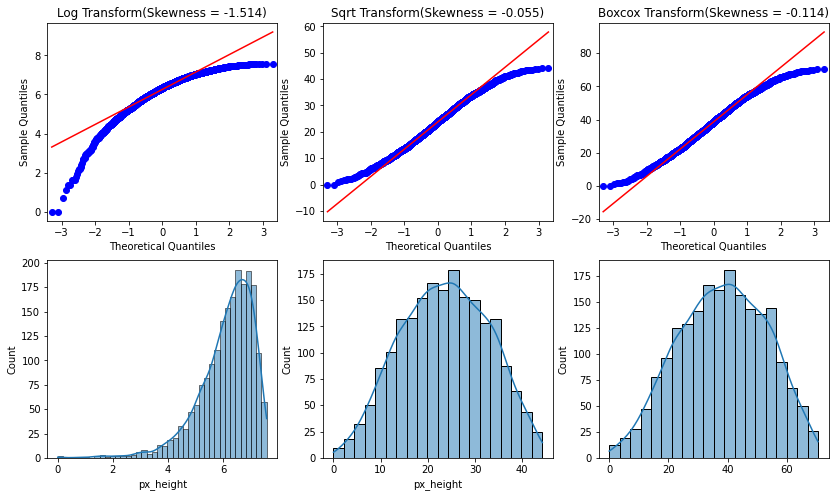

In [27]:
# q-q plot on continuous feature
fig, ax = plt.subplots( nrows = 2 , ncols = 3 , figsize = (14,8) )

name = skwed[1]

# log transform 
log = np.log(data[ name ]+1) # avoid 0 
sm.qqplot(log, line ='q',ax = ax[0,0])
sns.histplot( log,ax = ax[1,0],kde=True )
ax[0,0].set_title( f"Log Transform(Skewness = {  round(log.skew(), 3) })" )

# sqrt transform
sqrt = np.sqrt(data[name])
sm.qqplot(  sqrt , line ='q',ax = ax[0,1])
sns.histplot( sqrt,ax = ax[1,1],kde=True )
ax[0,1].set_title( f"Sqrt Transform(Skewness = {  round(sqrt.skew(), 3) })" )

#boxcox
fitted_data, fitted_lambda = sts.boxcox( data[name]+1 ) # avoid 0
sm.qqplot( fitted_data, line ='q',ax=ax[0,2] )
sns.histplot( fitted_data,ax = ax[1,2],kde=True  )
ax[0,2].set_title( f"Boxcox Transform(Skewness = {  round(pd.Series(fitted_data).skew(), 3) })" )

plt.show()

So, sqrt transform gives best result.

In [28]:
name

'px_height'

In [29]:
data_1 = data.copy()
data_1["px_height"] = sqrt

In [30]:
datas = [ data , data_0,data_1 ]

## Models

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [32]:
X = data.drop( columns="price_range" )
#X = data_0.drop( columns="price_range" )
#X = data_1.drop( columns="price_range" )

y = data["price_range"].copy()


In [33]:
sss = StratifiedShuffleSplit(n_splits=1,test_size = 0.24 , random_state=seed )
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[ train_index,: ], X.loc[ test_index,: ]
    y_train, y_test = y[train_index], y[test_index]
    

In [34]:
y_train.value_counts(), y_test.value_counts()

(0    380
 1    380
 2    380
 3    380
 Name: price_range, dtype: int64,
 0    120
 1    120
 2    120
 3    120
 Name: price_range, dtype: int64)

In [35]:
trained_models = []

In [36]:
def simple_scorer(model, X_train,y_train,X_test,y_test  ):
    cv = cross_val_score( model , X_train , y_train, cv = 10 )
    print( "Train score:",model.score( X_train , y_train )  )
    print( "Test score:",model.score( X_test , y_test )  )
    print( "StratifiedCV-Train(K=10):", cv.mean() )
    print( "StratifiedCV-Train(K=10) std: ",cv.std()  )
    

### Logistic Regression

In [37]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform( X_test )

In [38]:
lr = LogisticRegression()#multinomial
lr.fit( X_train_std, y_train )
trained_models.append( lr )

In [39]:
simple_scorer(lr , X_train_std , y_train , X_test_std , y_test)

Train score: 0.9809210526315789
Test score: 0.9604166666666667
StratifiedCV-Train(K=10): 0.9532894736842105
StratifiedCV-Train(K=10) std:  0.018942342169589416


### Support Vector Classifier

In [41]:
svc = SVC(probability=True,random_state=seed)
svc.fit( X_train, y_train )
trained_models.append(svc)

In [42]:
simple_scorer( svc, X_train , y_train , X_test , y_test )

Train score: 0.9526315789473684
Test score: 0.9583333333333334
StratifiedCV-Train(K=10): 0.9473684210526315
StratifiedCV-Train(K=10) std:  0.01883923824115308


### KNN

In [43]:
knn = KNeighborsClassifier()
knn.fit( X_train,y_train )
trained_models.append( knn )

In [44]:
simple_scorer( knn, X_train , y_train , X_test , y_test )

Train score: 0.9414473684210526
Test score: 0.9395833333333333
StratifiedCV-Train(K=10): 0.9105263157894739
StratifiedCV-Train(K=10) std:  0.015624134325049895


### XGB

In [45]:
xgb = XGBClassifier(objective="multi:softmax",use_label_encoder=False, eval_metric = "error",random_state = seed )
xgb.fit( X_train, y_train )
trained_models.append( xgb )

In [46]:
simple_scorer( xgb, X_train , y_train , X_test , y_test )

Train score: 1.0
Test score: 0.9270833333333334
StratifiedCV-Train(K=10): 0.8967105263157895
StratifiedCV-Train(K=10) std:  0.014125599048410434


## Model Evaluation

In [47]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,roc_curve,\
                            log_loss,auc,precision_score,recall_score                      


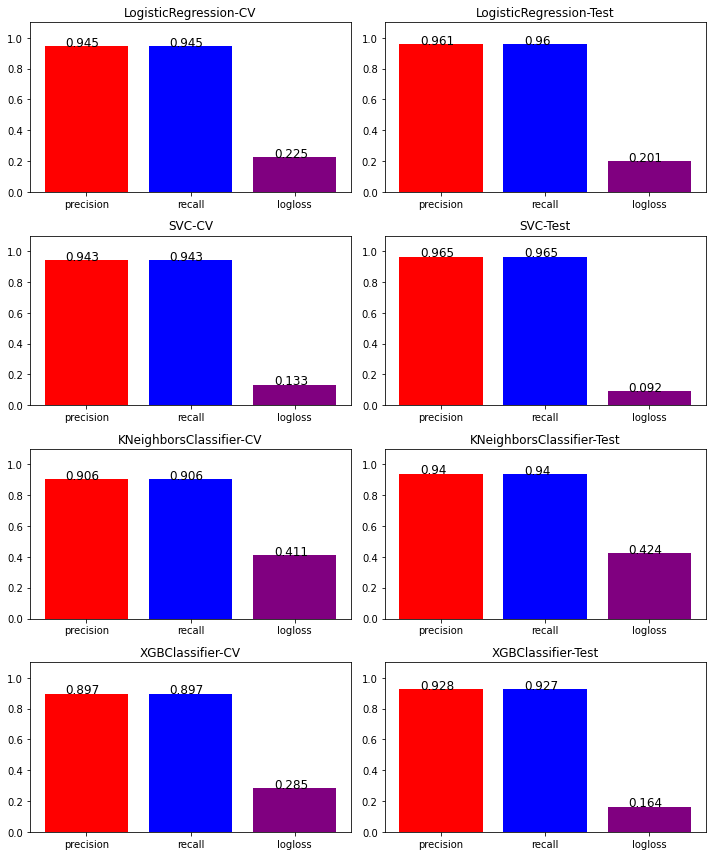

In [48]:
std_models = [ "LogisticRegression" ]

fig , ax = plt.subplots( nrows = len(trained_models) , figsize = (10,12), ncols=2 )

for i,model in enumerate(trained_models):
    if (model.__class__.__name__) in std_models: 
        pred_cv = cross_val_predict(model,X_train_std, y_train,cv=5, method="predict_proba" )
        pred_test = model.predict_proba(X_test_std)
    else:
        pred_cv = cross_val_predict(model,X_train, y_train,cv=5, method="predict_proba" )
        pred_test = model.predict_proba(X_test)
        
    pred_cv_cls =  [ np.argmax(i) for i in pred_cv ]
    pred_test_cls = [ np.argmax(i) for i in pred_test]
    
    # macro=weighted because classes are equally splited( also micro = accuracy)
    precision_cv = precision_score( y_train,pred_cv_cls, average="macro"  )
    ax[i,0].bar( "precision", precision_cv, color="red"  )
    ax[i,0].text( -0.2 , precision_cv , round(precision_cv,3) , fontsize = 12 )
    recall_cv= recall_score( y_train, pred_cv_cls ,average="macro" )
    ax[i,0].bar( "recall",recall_cv , color="blue" )
    ax[i,0].text( 0.8 , recall_cv , round(recall_cv,3) , fontsize = 12 )
    logloss_cv = log_loss(y_train, pred_cv)
    ax[i,0].bar( "logloss",logloss_cv , color="purple" )
    ax[i,0].text( 1.8 , logloss_cv , round(logloss_cv,3) , fontsize = 12 )
    
    
    precision_test = precision_score( y_test,pred_test_cls,average="macro"  )
    ax[i,1].bar( "precision", precision_test ,color="red"  )
    ax[i,1].text( -0.2 , precision_test , round(precision_test,3) , fontsize = 12 )
    recall_test= recall_score( y_test, pred_test_cls,average="macro" )
    ax[i,1].bar( "recall",recall_test ,color="blue" )
    ax[i,1].text( 0.8 , recall_test , round(recall_test,3) , fontsize = 12 )
    logloss_test = log_loss( y_test, pred_test)
    ax[i,1].bar( "logloss",logloss_test,color="purple"   )
    ax[i,1].text( 1.8 , logloss_test , round(logloss_test,3) , fontsize = 12 )
    
    
    ax[i,0].set_title( "{}-CV".format( model.__class__.__name__  ) )
    ax[i,1].set_title( "{}-Test".format( model.__class__.__name__  ))    
    
    
    ax[i,0].set_ylim(0, 1.1 )
    ax[i,1].set_ylim(0, 1.1 )

plt.tight_layout()
plt.show()

In [49]:
def roc_plot(y_true, pred_prob ,ax):
    n_class = len(y_true.unique())
    fpr = {}
    tpr = {}
    for i in range(n_class):    
        fpr[i], tpr[i], _ = roc_curve(y_true, pred_prob[:,i], pos_label=i,drop_intermediate = False)
       
    
    all_fpr = np.unique(np.concatenate([fpr[i].copy() for i in range(n_class)]))

    # interpolate all ROC curves at this points
    tpr_mean = np.zeros_like(all_fpr)
    for i in range(n_class):
        tpr_mean += np.interp(all_fpr, fpr[i], tpr[i])

    tpr_mean /= n_class
    fpr_mean = all_fpr
   

    fpr_max , fpr_min = list(fpr.values())[0].copy() ,  list(fpr.values())[0].copy()
    tpr_max,tpr_min = list(tpr.values())[0].copy() ,  list(tpr.values())[0].copy()
    for f,t in zip(list(fpr.values())[1:],list(tpr.values())[1:] ):
        if ( auc(f,t) > auc(fpr_max,tpr_max) ):
            tpr_max = t
            fpr_max = f
        if ( auc(f,t) < auc(fpr_min,tpr_min) ):
            tpr_min = t
            fpr_min = f
    
    ax.plot( fpr_mean , tpr_mean, linestyle='--',color='green', label='Mean(Macro)')
    ax.plot( fpr_min , tpr_min, linestyle='--',color='red', label='Min')
    ax.plot( fpr_max , tpr_max, linestyle='--',color='blue', label='Max')
    #ax.fill_between( fpr_mean , tpr_max, tpr_min ,alpha= 0.5,color="red" ) 


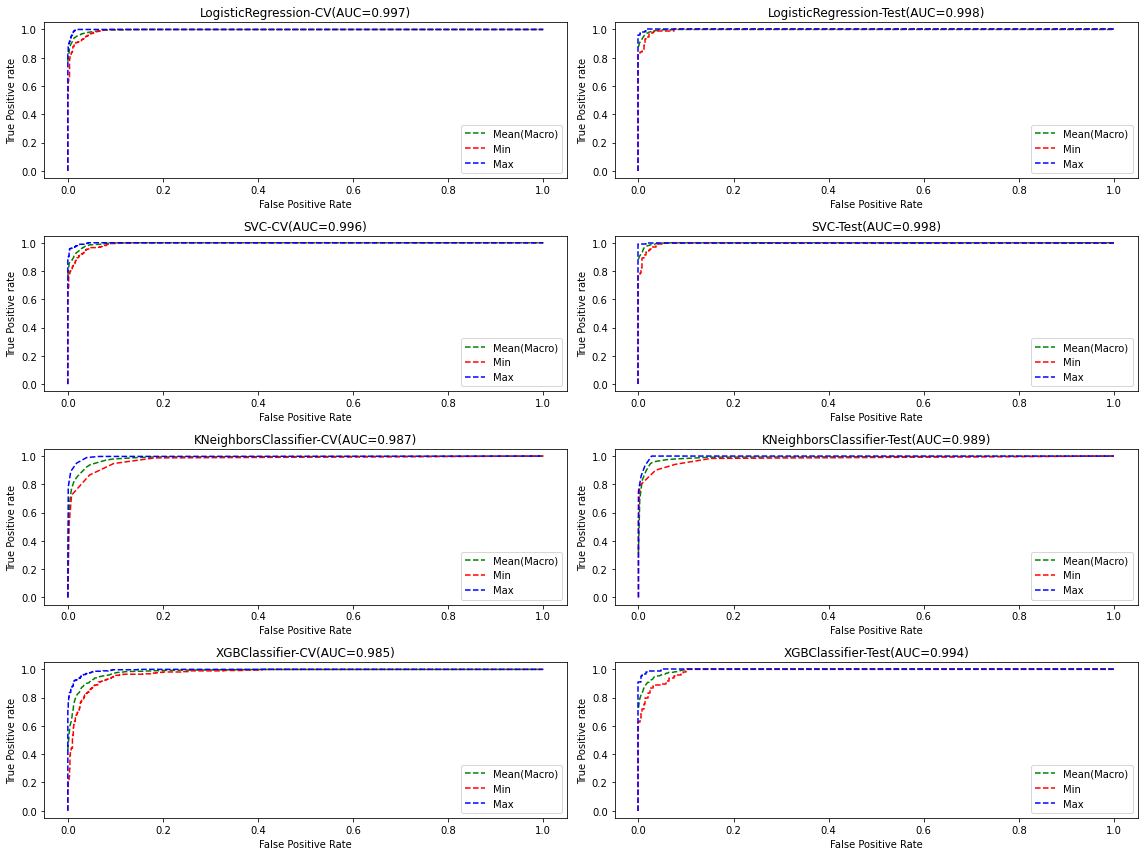

In [50]:
# plot roc curves(and auc scores)


fig,ax = plt.subplots(nrows = len(trained_models), ncols=2, figsize = (16,12))

for i,model in enumerate(trained_models):
    if (model.__class__.__name__) in std_models: 
        pred_cv = cross_val_predict(model,X_train_std, y_train,cv=5, method="predict_proba" )
        pred_test = model.predict_proba(X_test_std)
    else:
        pred_cv = cross_val_predict(model,X_train, y_train,cv=5, method="predict_proba" )
        pred_test = model.predict_proba(X_test)
    
    roc_plot( y_train,pred_cv, ax[i,0] )
    roc_plot( y_test,pred_test, ax[i,1] )
    
    # compute with Macro
    ax[i,0].set_title( "{}-CV(AUC={})".format( model.__class__.__name__, round(roc_auc_score( y_train ,pred_cv ,multi_class="ovr" ),3)  ) )
    ax[i,1].set_title( "{}-Test(AUC={})".format( model.__class__.__name__, round(roc_auc_score( y_test ,pred_test ,multi_class="ovr" ),3)  ))    
    
    ax[i,0].legend(loc='best')
    ax[i,1].legend(loc='best')
    
    ax[i,0].set_xlabel('False Positive Rate')
    ax[i,1].set_xlabel('False Positive Rate')
    
    ax[i,0].set_ylabel('True Positive rate')
    ax[i,1].set_ylabel('True Positive rate')



plt.tight_layout()
plt.show()

SVC and Logistic Regression have almost the same result. But SVC looks more certain( Has low logloss)<br>
So will continue with SVC


## Hypertuning

In [52]:
svc_param = {
    
    "C":[0.1,1,5,10,],
    "kernel":['linear','rbf'],
    "gamma":[ 0.1,1,5,10,"scale" ]
    
}

svc = SVC(probability=True,random_state=seed)
svc_grid = GridSearchCV(svc, svc_param, cv=5, scoring = "accuracy",n_jobs = -1,refit=True)

svc_grid_fit = svc_grid.fit(X_train,y_train)

In [53]:
svc_best = svc_grid_fit.best_estimator_

print(svc_grid_fit.best_score_)
print(svc_best.score(X_test,y_test))
print(svc_grid_fit.best_params_)

0.9677631578947368
0.9770833333333333
{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [58]:
simple_scorer(svc_best, X_train, y_train, X_test, y_test)
print( "Logloss-Test:", log_loss(y_test, svc_best.predict_proba(X_test) ) )
print( "Logloss-CV:", log_loss(y_train,  cross_val_predict(svc_best,X_train, y_train,cv=5, method="predict_proba" ) )        )

Train score: 0.9875
Test score: 0.9770833333333333
StratifiedCV-Train(K=10): 0.9703947368421053
StratifiedCV-Train(K=10) std:  0.01644736842105264
Logloss-Test: 0.08023904661252776
Logloss-CV: 0.10023725846201835


## Feature Importance

In [73]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(svc_best, random_state=seed).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist() )

Weight,Feature
0.7263 ± 0.0229,ram
0.2459 ± 0.0246,battery_power
0.1291 ± 0.0072,px_width
0.1271 ± 0.0197,px_height
0.0379 ± 0.0072,mobile_wt
0.0076 ± 0.0024,int_memory
0.0042 ± 0.0023,n_cores
0.0026 ± 0.0034,sc_h
0.0007 ± 0.0030,pc
0.0001 ± 0.0005,touch_screen
